# Section 4-8 - Venus SmallSat Aerocapture - Orbiter Deflection Maneuver

In [1]:
import numpy as np
from AMAT.maneuver import ProbeOrbiterDeflection

In [40]:
deflection = ProbeOrbiterDeflection(arrivalPlanet="VENUS",
                                    v_inf_vec_icrf_kms=np.array([-3.26907094,  0.67649494, -1.0697747 ]),
                                    rp_probe=(6051.8+103.85)*1e3,  psi_probe=np.pi, h_EI_probe=150e3,
                                    rp_space=(6051.8 + 400) * 1e3, psi_space=np.pi,
                                    r_dv_rp=112.5)

In [41]:
print("Divert manuever DV: "+str(deflection.dv_maneuver_vec)+ " m/s")
print("Divert manuever DV magnitude: "+str(round(deflection.dv_maneuver_mag,3))+ " m/s")

Divert manuever DV: [-0.96047394  0.10474908  2.39865055] m/s
Divert manuever DV magnitude: 2.586 m/s


In [42]:
print("TOF from probe release to atm. entry interface: "+str(round(deflection.TOF_probe,6))+ " days")
print("TOF from probe release to orbiter periapsis   : "+str(round(deflection.TOF_space,6))+ " days")

TOF from probe release to atm. entry interface: 2.003604 days
TOF from probe release to orbiter periapsis   : 2.004355 days


Run the following code to generate the approach trajectory plot. The code is also available in the file ```section-08-mars-smallsat-orbiter-deflection.py```.

```
from mayavi import mlab
import numpy as np
from tvtk.tools import visual
from AMAT.approach import Approach
from astropy.time import Time
from AMAT.arrival import Arrival

def Arrow_From_A_to_B(x1, y1, z1, x2, y2, z2):
    ar1 = visual.arrow(x=x1, y=y1, z=z1)
    ar1.length_cone = 0.4

    arrow_length = np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2 + (z2 - z1) ** 2)
    ar1.actor.scale = [arrow_length, arrow_length, arrow_length]
    ar1.pos = ar1.pos / arrow_length
    ar1.axis = [x2 - x1, y2 - y1, z2 - z1]
    return ar1

arrival = Arrival()
arrival.set_vinf_vec_from_lambert_arc(lastFlybyPlanet='EARTH',
                                      arrivalPlanet='MARS',
                                      lastFlybyDate=Time("2020-07-30 00:00:00", scale='tdb'),
                                      arrivalDate=Time("2021-02-18 00:00:00", scale='tdb'))



probe = Approach("MARS",
                    v_inf_vec_icrf_kms=np.array([ 2.23930484,  1.20086474, -0.73683366]),
                    rp=(3389.5+52)*1e3, psi=3*np.pi/2,
                    is_entrySystem=True, h_EI=120e3)


space = Approach("MARS",
                    v_inf_vec_icrf_kms=np.array([ 2.23930484,  1.20086474, -0.73683366]),
                    rp=(3389.5+250)*1e3, psi=np.pi)

north_pole_bi_vec = probe.ICRF_to_BI(arrival.north_pole)

theta_star_arr_probe = np.linspace(-2, probe.theta_star_entry, 101)
pos_vec_bi_arr_probe = probe.pos_vec_bi(theta_star_arr_probe)/3389.5e3


theta_star_arr_space = np.linspace(-1.85, 0.0, 101)
pos_vec_bi_arr_space = space.pos_vec_bi(theta_star_arr_space)/3389.5e3

x_arr_probe = pos_vec_bi_arr_probe[0][:]
y_arr_probe = pos_vec_bi_arr_probe[1][:]
z_arr_probe = pos_vec_bi_arr_probe[2][:]

x_arr_space = pos_vec_bi_arr_space[0][:]
y_arr_space = pos_vec_bi_arr_space[1][:]
z_arr_space = pos_vec_bi_arr_space[2][:]


u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = 1*np.outer(np.cos(u), np.sin(v))
y = 1*np.outer(np.sin(u), np.sin(v))
z = 1*np.outer(np.ones(np.size(u)), np.cos(v))

x1 = 1.040381198513972*np.outer(np.cos(u), np.sin(v))
y1 = 1.040381198513972*np.outer(np.sin(u), np.sin(v))
z1 = 1.040381198513972*np.outer(np.ones(np.size(u)), np.cos(v))


x_ring_1 = 1.1*np.cos(u)
y_ring_1 = 1.1*np.sin(u)
z_ring_1 = 0.0*np.cos(u)

x_ring_2 = 1.2*np.cos(u)
y_ring_2 = 1.2*np.sin(u)
z_ring_2 = 0.0*np.cos(u)

mlab.figure(bgcolor=(0,0,0))
s1 = mlab.mesh(x, y, z, color=(0.8,0,0.2))
s2 = mlab.mesh(x1, y1, z1, color=(0.8,0,0.2), opacity=0.3)
r1 = mlab.plot3d(x_ring_1, y_ring_1, z_ring_1, color=(1,1,1), line_width=1, tube_radius=None)
#r2 = mlab.plot3d(x_ring_2, y_ring_2, z_ring_2, color=(1,1,1), line_width=1, tube_radius=None)

p1 = mlab.plot3d(x_arr_probe, y_arr_probe, z_arr_probe, color=(0,1,0), line_width=3, tube_radius=None)
p2 = mlab.plot3d(x_arr_space, y_arr_space, z_arr_space, color=(1,0,1), line_width=3, tube_radius=None)


mlab.plot3d([0, 1.05 * north_pole_bi_vec[0]],
                   [0, 1.05 * north_pole_bi_vec[1]],
                   [0, 1.05 * north_pole_bi_vec[2]])

mlab.show()
```

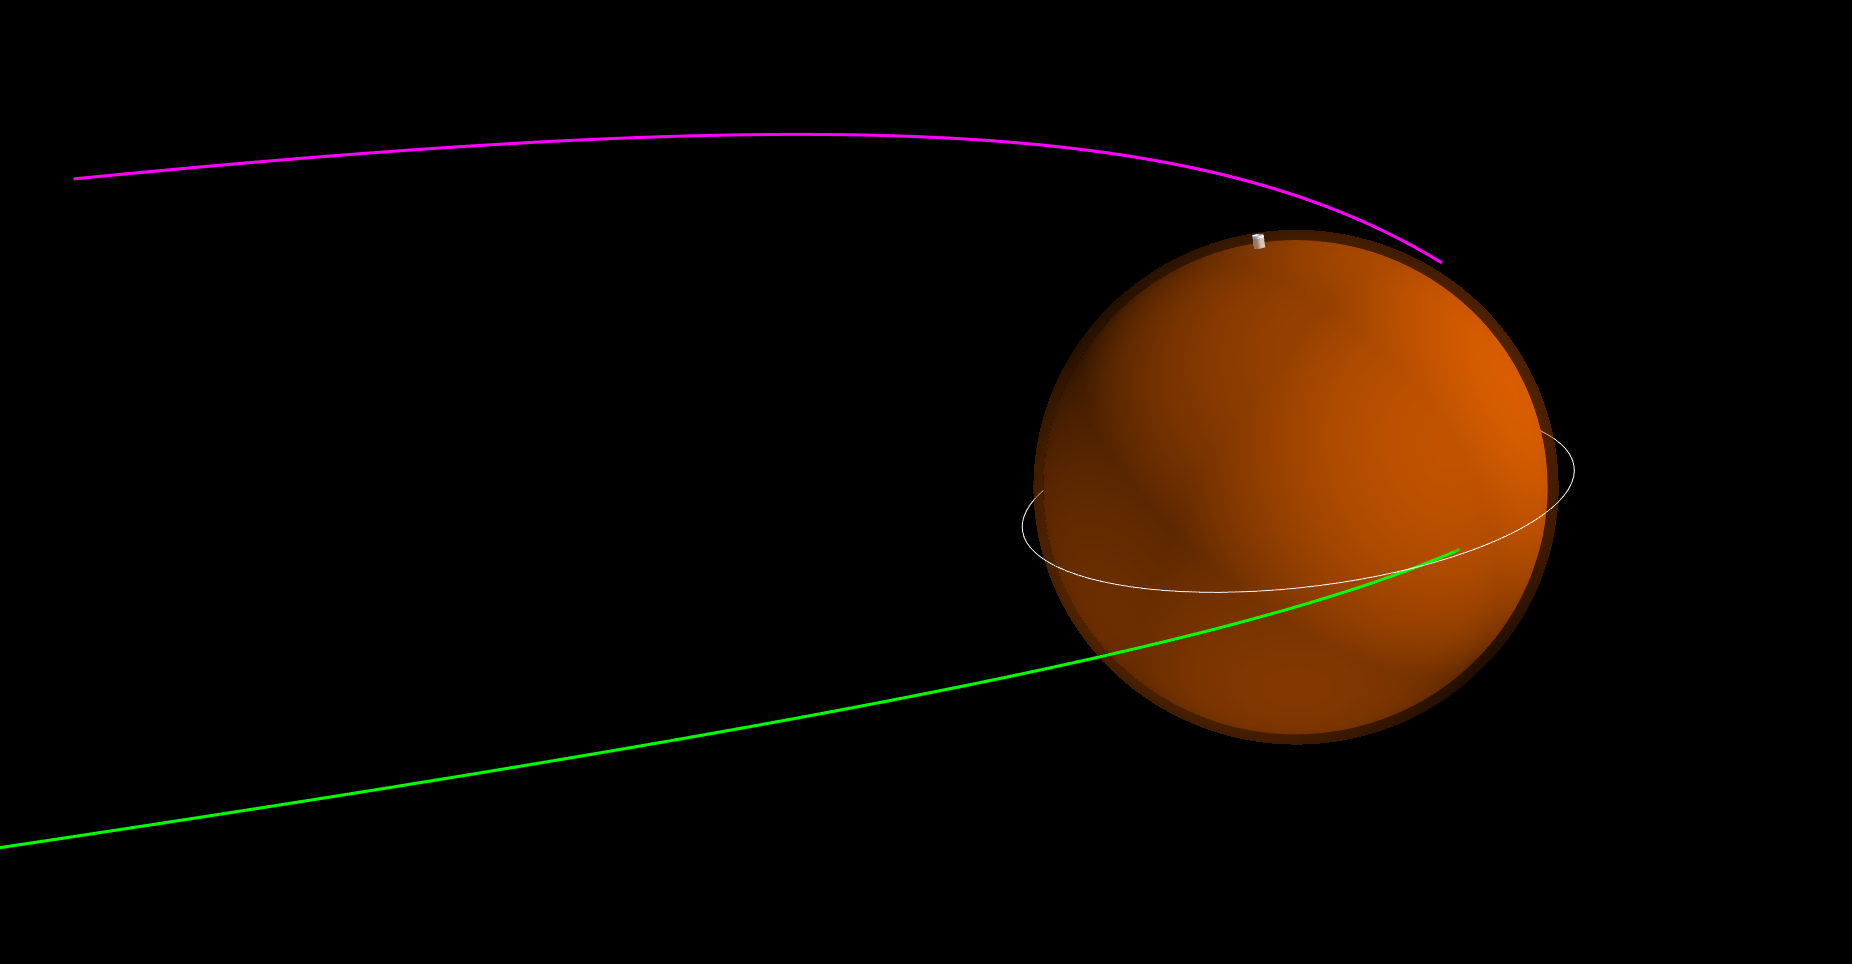

In [6]:
from IPython.display import Image
Image(filename='../../../plots/smallsat-and-orbiter-approach.png', width=1200)